In [7]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [8]:
#Import csv file for hospital charges
df = pd.read_csv("Inpatient_Prospective_Payment_System.csv")
df.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       ' Total Discharges ', ' Average Covered Charges ',
       ' Average Total Payments ', 'Average Medicare Payments'],
      dtype='object')

In [9]:
#Convert strings to numeric in dataframe and export cleaned csv
df[' Average Covered Charges '] = pd.to_numeric(df[' Average Covered Charges '].apply(lambda x: x.strip('$')))
df[' Average Total Payments '] = pd.to_numeric(df[' Average Total Payments '].apply(lambda x: x.strip('$')))
df['Average Medicare Payments'] = pd.to_numeric(df['Average Medicare Payments'].apply(lambda x: x.strip('$')))
#df.to_csv("hospital_charges_numeric.csv")
df.head(1)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73


In [20]:
#Filter for top 5 services
top_5 = df.loc[(df['DRG Definition'] == "194 - SIMPLE PNEUMONIA & PLEURISY W CC") |
               (df['DRG Definition'] == "690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC") |
               (df['DRG Definition'] == "292 - HEART FAILURE & SHOCK W CC") |
               (df['DRG Definition'] == "392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC") |
               (df['DRG Definition'] == "641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC"), :]
df.to_csv("top_5_services.csv")
top_5.head(2)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
25714,194 - SIMPLE PNEUMONIA & PLEURISY W CC,50242,DOMINICAN HOSPITAL,1555 SOQUEL DRIVE,SANTA CRUZ,CA,95065,CA - Santa Cruz,96,60386.84,9175.01,8250.46
25800,194 - SIMPLE PNEUMONIA & PLEURISY W CC,70027,MANCHESTER MEMORIAL HOSPITAL,71 HAYNES ST,MANCHESTER,CT,6040,CT - Hartford,69,16737.85,6583.78,5606.82


In [14]:
top_5_list = top_5['DRG Definition'].unique()
top_5_list

array(['194 - SIMPLE PNEUMONIA & PLEURISY W CC',
       '292 - HEART FAILURE & SHOCK W CC',
       '392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC',
       '641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC',
       '690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC'], dtype=object)

In [12]:
def make_histogram(service):
    service_df = top_5.loc[(top_5['DRG Definition'] == service)]
    mins = service_df[' Average Covered Charges '].min()
    maxs = service_df[' Average Covered Charges '].max()
    bins = np.arange(0,maxs, 2000)
    plt.figure(figsize=(20,10))
    print(plt.hist(service_df[' Average Covered Charges '], bins=bins))

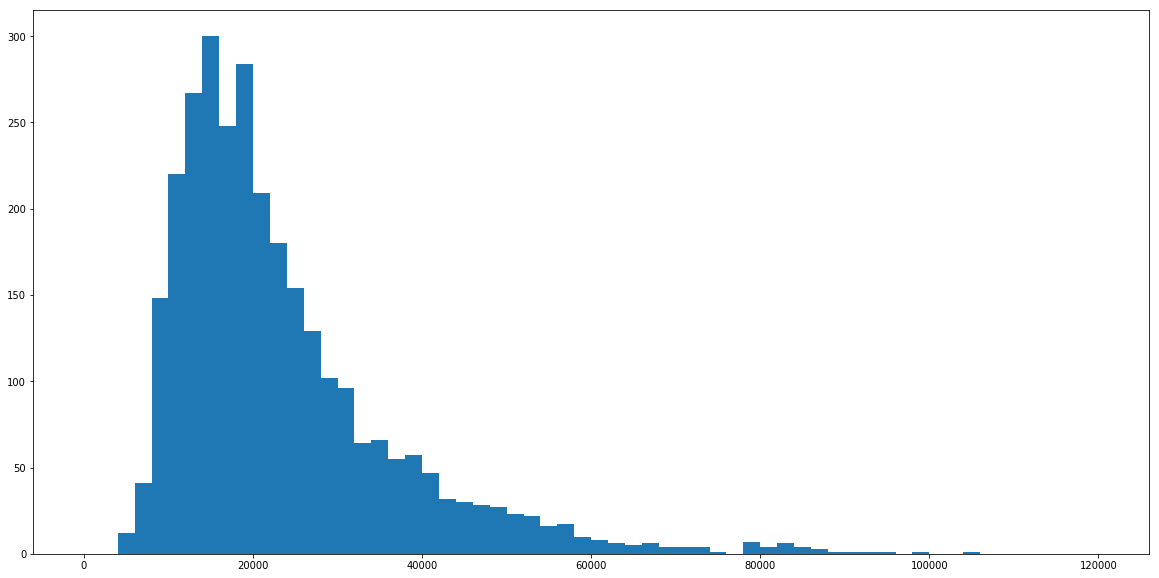

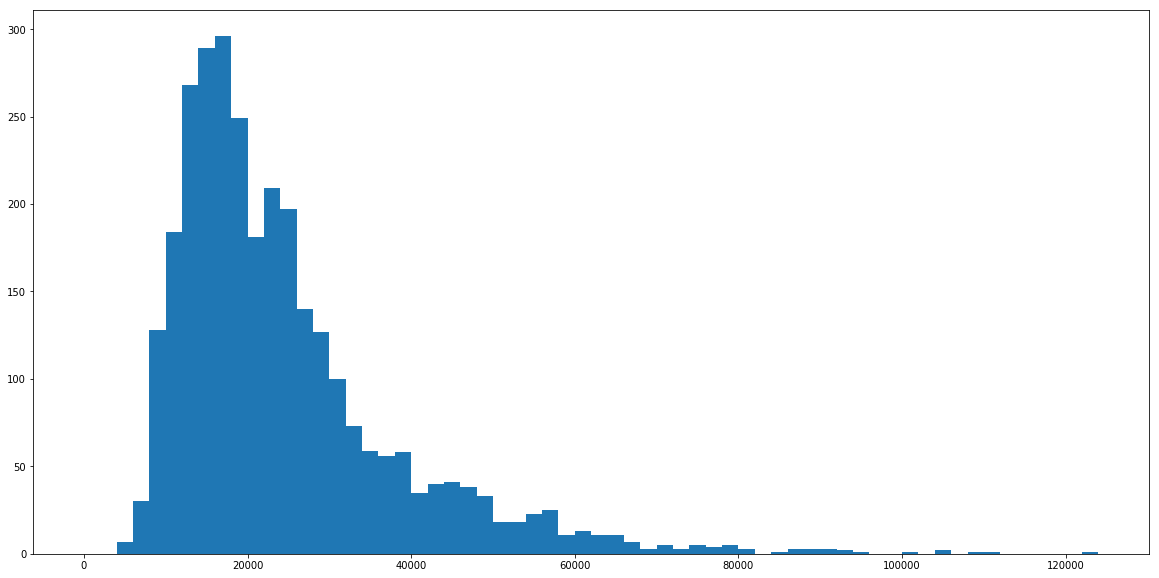

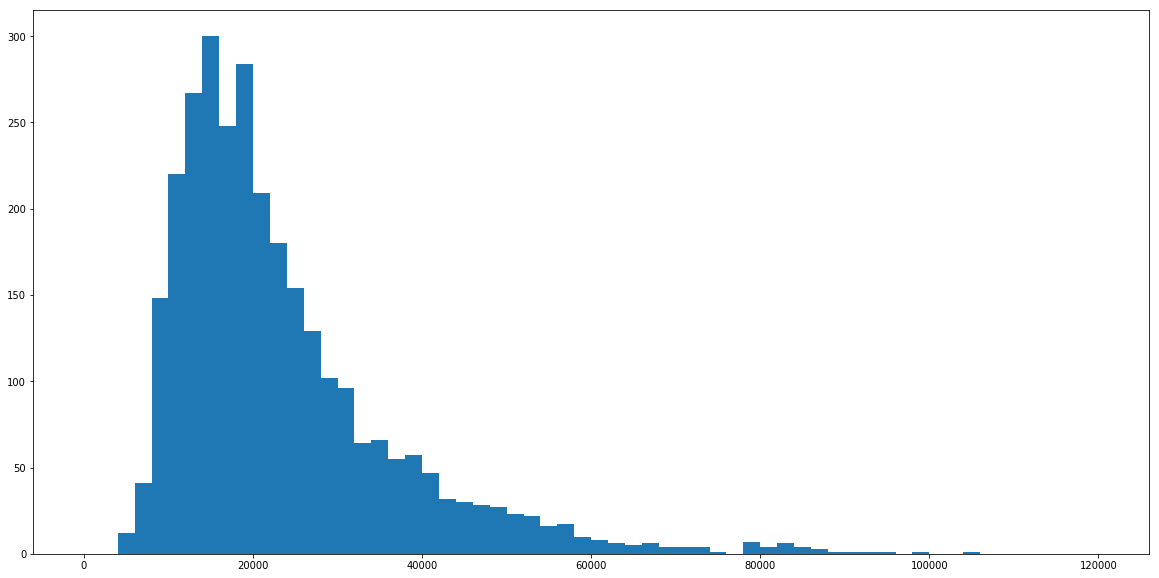

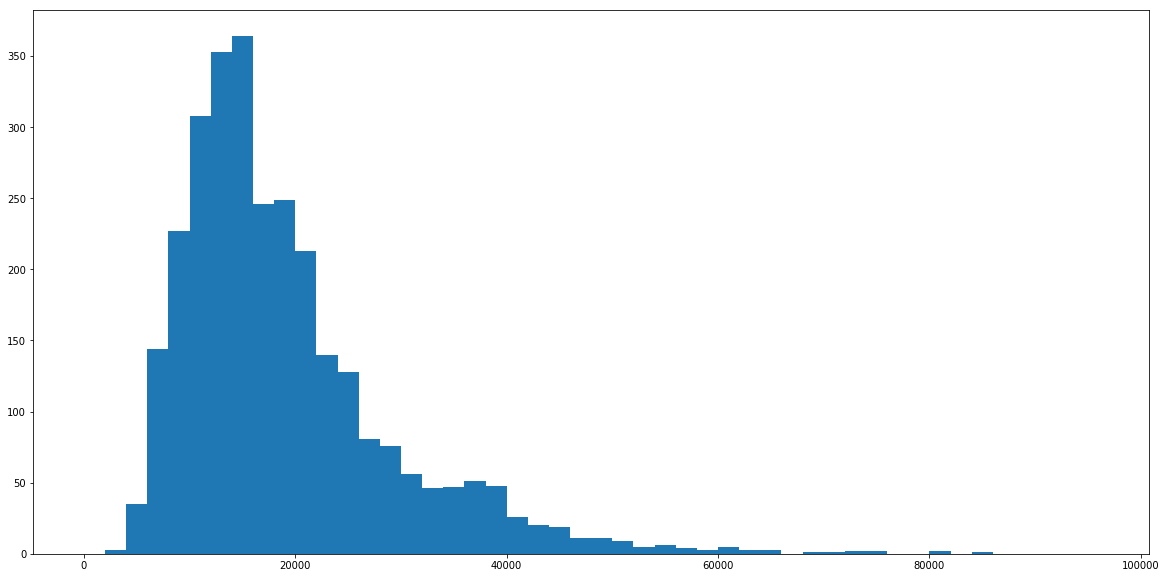

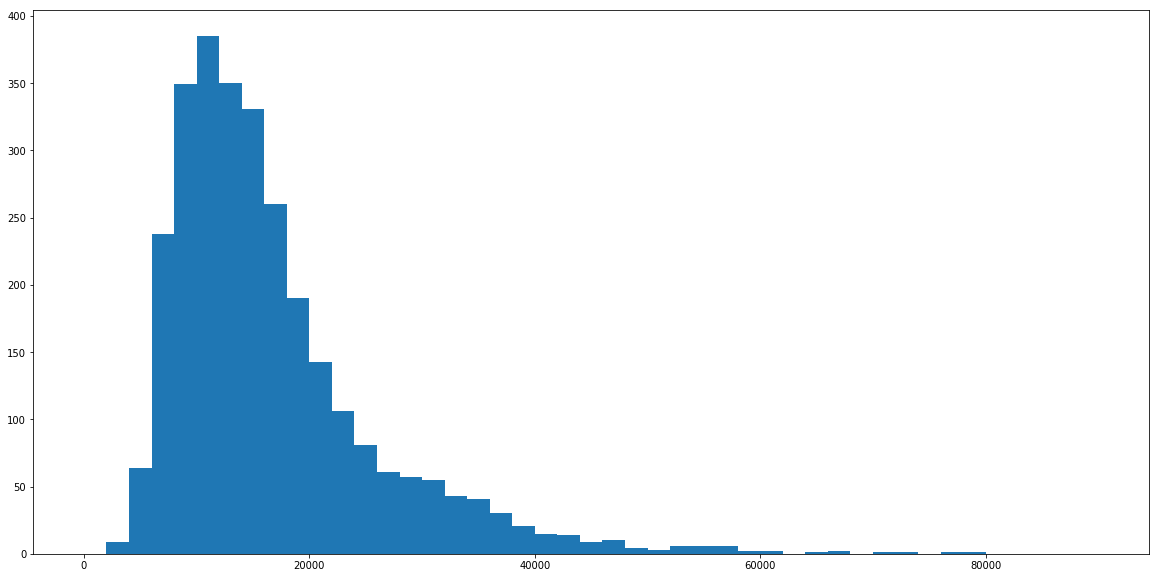

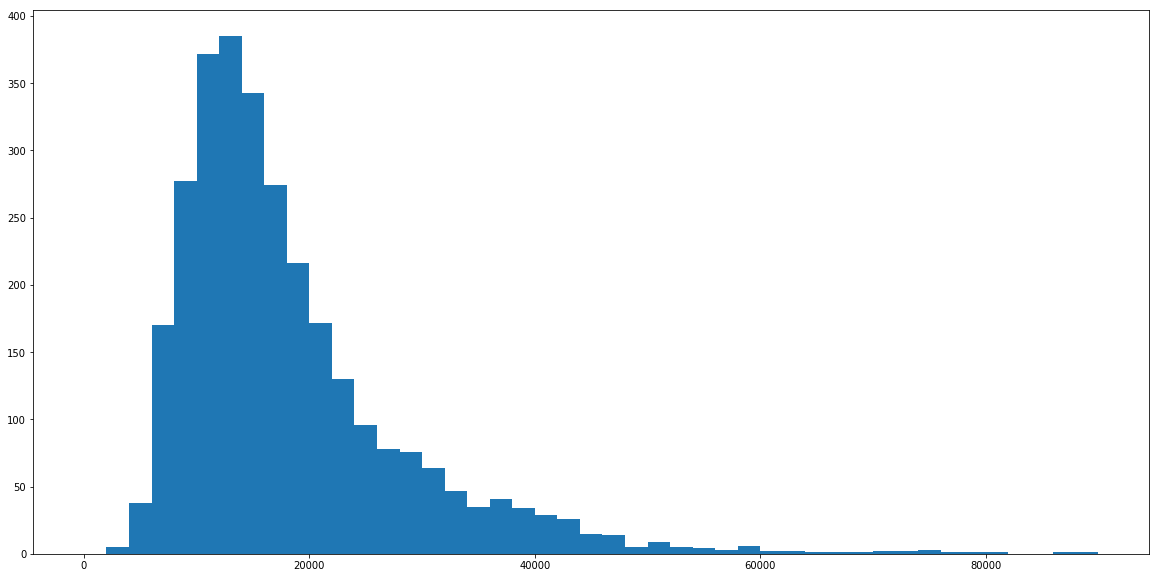

In [16]:
for service in top_5_list:
    make_histogram(service)

In [17]:
grouped_5 = top_5.groupby("DRG Definition")
mean_5 = grouped_5.mean()
sem_5 = grouped_5.sem()
mean_5.head()

,Provider Id,Provider Zip Code,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
DRG Definition,,,,,,
194 - SIMPLE PNEUMONIA & PLEURISY W CC,259537.788621,50358.601389,65.626861,24549.381211,6963.253596,5890.898812
292 - HEART FAILURE & SHOCK W CC,258867.616661,50001.124958,75.190654,23517.980789,6957.831656,6132.341256
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",258448.829492,49973.425424,83.001356,19086.716512,5041.766136,3962.437668
"641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC",259015.955847,49832.188341,53.004484,16703.611059,4781.625178,3855.451093
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,259098.446972,50231.157912,69.151890,18280.231134,5353.763309,4437.804065


In [18]:
sem_5.head()

,Average Covered Charges,Average Total Payments,Total Discharges,Average Medicare Payments,Hospital Referral Region Description,Provider City,Provider Id,Provider Name,Provider State,Provider Street Address,Provider Zip Code
DRG Definition,,,,,,,,,,,
194 - SIMPLE PNEUMONIA & PLEURISY W CC,259.649362,29.978702,0.871856,29.579597,NaN,NaN,2828.377322,NaN,NaN,NaN,503.304218
292 - HEART FAILURE & SHOCK W CC,251.170742,30.373737,1.215734,30.098924,NaN,NaN,2861.170487,NaN,NaN,NaN,511.462385
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",191.751762,21.648651,1.409529,21.554777,NaN,NaN,2859.000839,NaN,NaN,NaN,509.897061
"641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC",176.779380,21.688191,0.754585,20.999926,NaN,NaN,2870.907697,NaN,NaN,NaN,511.503230
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,191.185724,23.507670,1.068838,23.416986,NaN,NaN,2857.759501,NaN,NaN,NaN,505.726215
